# MOVIE RECOMMENDATION 2022
© Explore Data Science Academy

<br></br>

<div align="center" style="width: 700px; font-size: 80%; text-align: center; margin-left: 100px">
<img src="resources/imgs/Image_header.png"
     alt="Collaborative-based Filtering - Utility Matrix"
     style="float: center; padding-bottom=0.5em"
     width=700px/>
</div>

#### Development Team

1. Mercy Milkah Gathoni
2. Linda Kelida
3. Samuel Mijan
4. Sipho Lukhele
5. Jessica Njuguna

<a id="one"></a>
## 1. INTRODUCTION

## Overview


On the internet, where the number of choices is overwhelming, there is a need to filter, prioritize and efficiently deliver relevant information in order to reduce the problem of information overload, which has created a potential problem to many Internet users. Recommender systems solve this problem by searching through large volume of dynamically generated information to provide users with personalized content and services. 

Recommender systems are information filtering systems that deal with the problem of information overload by filtering vital information fragment out of large amount of dynamically generated information according to user’s preferences, interest, or observed behaviour about item. Recommender system has the ability to predict whether a particular user would prefer an item or not based on the user’s profile.

Recommender systems are beneficial to both service providers and users. They reduce transaction costs of finding and selecting items in an online shopping environment. Recommendation systems have also proved to improve decision making process and quality.

### Problem Statement

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

<a id="cont"></a>
### Table of Contents

**<a href=#one>1. Introduction</a>**
- Problem Statement
- Table of Contents
- Summary
- Preliminary Activities


**<a href=#two>2. Exploratory Data Analysis</a>**


**<a href=#three>3. Feature Engineering</a>**
- Dealing with Null Values
- Data Scaling
- Dimension Reduction


**<a href=#four>4. Modelling</a>**
- Logging Comet Experiments


**<a href=#five>5. Model Perfomance Comparison</a>**


**<a href=#six>6. Model Explanations</a>**


**<a href=#seven>7. Conclusion</a>**


**<a href=#eight>8. Appendix</a>**
- Kaggle Submissions

### Summary

**Agenda:**

**Deliverables:**

**Results:**

### Preliminary Activities

#### Comet set up

Comet ML is an experimentation platform, which permits testing Machine Learning projects, from the beginning up to the final monitoring.

Doing ML with Comet is like building with legos. You can customize and combine your data, code, visualizations, reports, and much more to create exactly what you want.

So we start by integrating our notebook with Comet.ml so that we can see everything we will do with our data.

In [1]:
from comet_ml import Experiment

In [2]:
experiment = Experiment(api_key="MHehhbanm9HbbvXptMjQ0hinn",
    project_name="movie-recommender-2022",
    workspace="jessica-njuguna")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jessica-njuguna/movie-recommender-2022/96aceddbc6dd40c3a99c51f43dc4b313



#### Importing Packages

In [3]:
!!pip install wordcloud

['Requirement already satisfied: wordcloud in /home/explore-student/anaconda3/lib/python3.7/site-packages (1.8.1)',
 'Requirement already satisfied: pillow in /home/explore-student/anaconda3/lib/python3.7/site-packages (from wordcloud) (7.0.0)',
 'Requirement already satisfied: numpy>=1.6.1 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from wordcloud) (1.18.1)',
 'Requirement already satisfied: matplotlib in /home/explore-student/anaconda3/lib/python3.7/site-packages (from wordcloud) (3.1.3)',
 'Requirement already satisfied: cycler>=0.10 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from matplotlib->wordcloud) (0.10.0)',
 'Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from matplotlib->wordcloud) (2.4.6)',
 'Requirement already satisfied: python-dateutil>=2.1 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from matplotlib->wordcloud) (2.8.1)',
 '

In [4]:
# Libraries for data loading, data manipulation
import pandas as pd

# Libraries for mathematical analyses
import numpy as np

#Libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
from wordcloud import WordCloud
from datetime import datetime
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

import operator
import heapq
from surprise import Reader, Dataset
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp


# from statsmodels.graphics.correlation import plot_corr
# from PIL import Image, ImageOps, ImageEnhance, PILLOW_VERSION
# from wordcloud import STOPWORDS

# #Libraries to clean the text
# import contractions #This expands contraction such as 'don't' to 'do not'
# import regex as re
# import string
# import nltk
# from nltk.tokenize import TreebankWordTokenizer
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords
# import emoji #allows us to manipulate with emojis
# import itertools

# #Libraries for text pre-processing
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# #Libraries for data balancing
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE


# # Libraries for model building
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# #Libraries for Model Performance
# from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
# from sklearn.tree import plot_tree

#Library for creating pickle files of the models
import pickle

#### Importing Data

*****Brief explanation about the data*****

In [5]:
raw_train_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/train.csv')
raw_test_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/test.csv')
raw_movies_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/movies.csv')
raw_tags_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/tags.csv')
raw_links_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/links.csv')
raw_imdb_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/imdb_data.csv')
raw_getags_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/genome-tags.csv')
raw_gescores_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/genome-scores.csv')

###### Before we Start on Exploratory Data Analysis

###### We need to have a high view on all  our data frames 

We will create functions to perform basic EDA on all the datasets

###### Head() prints the first 5 rows of our dataset including column header and the content of each row.

In [6]:
#function that displays the first five raws of a data frame
def display_df(df):
    '''This functions takes in a dataframe and returns the first five raws of it'''
    return df.head()

Call the function to any data frame that we have ... Here we will call the function on the train set and have a look at the columns and the values in it

###### Describe() gives the mean, median, standard deviation and percentiles of all the numerical values in our dataset. 

So we create a function that takes in a dataframe and returns the summary statistics

In [8]:
#define a data frame summary statistic function
def summary_stat(df):
    '''This function takes a dataframe and returns the summary statistics of all numerical columns'''
    return df.describe()

In [9]:
# The following function will check the data types, count the number of observations and the total sum of the misssing values in each data set
def basic_eda(df):
    print('The columns data types are as follows: \n')
    print(df.info(), '\n')
    print('The dataframe has datapoints totalling to: \n')
    print(df.shape[0], '\n')
    print('Checking the number of missing values in the columns \n')
    print(df.isna().sum())
    return

<a id="two"></a>
## 2. EXPLORATORY DATA ANALYSIS
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

What is EDA?

EDA is Exploratory is a robust technique for familiarising yourself with the Data and extracting useful insights.

EDA is important because besides getting the basic insights and general understanding of our data, we can set the procedure and steps to follow on the entire modelling course.

The datasets took a long time to load, this suggests that the files may be large. Let us view the size of each dataset using the function below:

In [10]:
def view_memory_usage(df, verbose = True):
    mem = df.memory_usage().sum() / 1024 ** 2
    print("Memory usage is {:.2f} Mb \n".format(mem))
    return

In [11]:
print('Train df:')
view_memory_usage(raw_train_df, verbose = True)
print('Test df:')
view_memory_usage(raw_test_df , verbose = True)
print('Movies df:')
view_memory_usage(raw_movies_df, verbose = True)
print('Tags df:')
view_memory_usage(raw_tags_df, verbose = True)
print('Links df:')
view_memory_usage(raw_links_df, verbose = True)
print('IMDB df:')
view_memory_usage(raw_imdb_df, verbose = True)
print('Genome_tags df:')
view_memory_usage(raw_getags_df, verbose = True)
print('Genome_scores df:')
view_memory_usage(raw_gescores_df, verbose = True)

Train df:
Memory usage is 305.18 Mb 

Test df:
Memory usage is 76.29 Mb 

Movies df:
Memory usage is 1.43 Mb 

Tags df:
Memory usage is 33.37 Mb 

Links df:
Memory usage is 1.43 Mb 

IMDB df:
Memory usage is 1.25 Mb 

Genome_tags df:
Memory usage is 0.02 Mb 

Genome_scores df:
Memory usage is 356.70 Mb 



The total memory for all the files uploaded totals to 776 MBs with our largest files being the train df and genome scores df. This will slow down the overall processing of the data. One way to tackle this is to reduce the file size.

#### Reducing file size

As mentioned above, our data is large hence we need to reduce the file size. One way to do this is by changing the data type. We will do this using the function below.

In [12]:
#A00
def reduce_memory_usage(df1, verbose=True):
    df = df1.copy(deep = True)
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

Now that the function has been successfully initialized we can apply it to the dataset

In [13]:
#A00
train_df = reduce_memory_usage(raw_train_df, verbose=True)
test_df= reduce_memory_usage(raw_test_df, verbose=True)
movies_df= reduce_memory_usage(raw_movies_df, verbose=True)
tags_df= reduce_memory_usage(raw_tags_df, verbose=True)
links_df= reduce_memory_usage(raw_links_df, verbose=True)
imdb_df= reduce_memory_usage(raw_imdb_df, verbose=True)
getags_df= reduce_memory_usage(raw_getags_df, verbose=True)
gescores_df= reduce_memory_usage(raw_gescores_df, verbose=True)

Mem. usage decreased to 152.59 Mb (50.0% reduction)
Mem. usage decreased to 38.15 Mb (50.0% reduction)
Mem. usage decreased to 1.19 Mb (16.7% reduction)
Mem. usage decreased to 20.85 Mb (37.5% reduction)
Mem. usage decreased to 0.71 Mb (50.0% reduction)
Mem. usage decreased to 1.04 Mb (16.7% reduction)
Mem. usage decreased to 0.01 Mb (37.2% reduction)
Mem. usage decreased to 148.62 Mb (58.3% reduction)


Success! Our memory has been reduced from a total of 776 MBs to 363 MBs, a 53% reduction. We can now proceed to conduct the EDA of each dataset.

### Train Df

In [14]:
display_df(train_df)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [15]:
basic_eda(train_df)

The columns data types are as follows: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int32  
dtypes: float32(1), int32(3)
memory usage: 152.6 MB
None 

The dataframe has datapoints totalling to: 

10000038 

Checking the number of missing values in the columns 

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


###### There are no null values in the train data set

In [34]:
# We check the Train data set's Statistics
summary_stat(train_df)

,userId,movieId,rating,rating_year,month,hour_of_day
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.540094e+00,2.008016e+03,6.608999e+00,1.250781e+01
std,4.679359e+04,3.919578e+04,1.036790e+00,7.210808e+00,3.506958e+00,7.347681e+00
min,1.000000e+00,1.000000e+00,5.000000e-01,1.995000e+03,1.000000e+00,0.000000e+00
25%,4.051000e+04,1.197000e+03,3.000000e+00,2.002000e+03,4.000000e+00,5.000000e+00
50%,8.091400e+04,2.947000e+03,3.500000e+00,2.007000e+03,7.000000e+00,1.400000e+01
75%,1.215790e+05,8.630000e+03,4.000000e+00,2.015000e+03,1.000000e+01,1.900000e+01
max,1.625410e+05,2.091710e+05,5.000000e+00,2.019000e+03,1.200000e+01,2.300000e+01


In [16]:
# Checking the Total sum of Unique Users
len(train_df['userId'].unique())

162541

In [17]:
#Checking the Total sum of Unique Movies watched
len(train_df['movieId'].unique())

48213

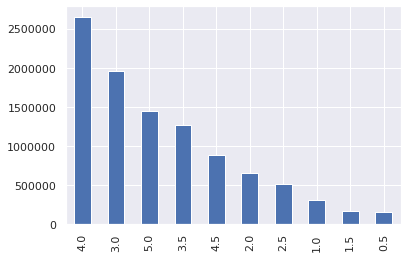

In [18]:
# The graph showing how many movies had specific ratings
train_df['rating'].value_counts().plot(kind = 'bar')

The highest rating is 4, with over 2.5 million movies being rated 4

In [19]:
# Changing the Timestamp column to Datetime data type
train_df['timestamp'] = train_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [20]:
# Display the dataframe to see how it has turned out
display_df(train_df)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,2018-02-11 11:53:12
1,106343,5,4.5,2008-03-23 02:18:59
2,146790,5459,5.0,2004-02-08 04:45:39
3,106362,32296,2.0,2015-02-04 09:36:05
4,9041,366,3.0,1996-05-29 13:17:17


In [21]:
# Here we split the Timestamp column into year, month, day of week and hour, so as to help analyse the data better
train_df['rating_year'] = pd.to_datetime(train_df['timestamp']).dt.year
train_df['month'] = pd.DatetimeIndex(train_df['timestamp']).month
train_df['day_of_week'] = pd.DatetimeIndex(train_df['timestamp']).dayofweek
train_df['hour_of_day'] = pd.DatetimeIndex(train_df['timestamp']).hour

In [22]:
# We have a look at how the dataframe looks like
display_df(train_df)

,userId,movieId,rating,timestamp,rating_year,month,day_of_week,hour_of_day
0,5163,57669,4.0,2018-02-11 11:53:12,2018,2,6,11
1,106343,5,4.5,2008-03-23 02:18:59,2008,3,6,2
2,146790,5459,5.0,2004-02-08 04:45:39,2004,2,6,4
3,106362,32296,2.0,2015-02-04 09:36:05,2015,2,2,9
4,9041,366,3.0,1996-05-29 13:17:17,1996,5,2,13


In [25]:
# Change the numbers on the day_of_week column to actual names of days so that we can derive insights better from the data set
days = { 0: 'Mon', 1: 'Tue', 2: 'Wed', 3:'Thurs', 4:'Fri', 5: 'Sat', 6: 'Sun'}

train_df['day_of_week'] = train_df['day_of_week'].apply(lambda x: days[x])
display_df(train_df)

,userId,movieId,rating,timestamp,rating_year,month,day_of_week,hour_of_day
0,5163,57669,4.0,2018-02-11 11:53:12,2018,2,Sun,11
1,106343,5,4.5,2008-03-23 02:18:59,2008,3,Sun,2
2,146790,5459,5.0,2004-02-08 04:45:39,2004,2,Sun,4
3,106362,32296,2.0,2015-02-04 09:36:05,2015,2,Wed,9
4,9041,366,3.0,1996-05-29 13:17:17,1996,5,Wed,13


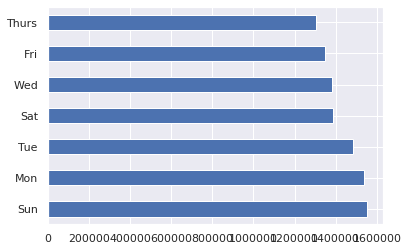

In [26]:
# Check which day of the week are most movies watched, from the graph below we see it's Sunday with a small lead over Mondays
train_df['day_of_week'].value_counts().plot(kind='barh')

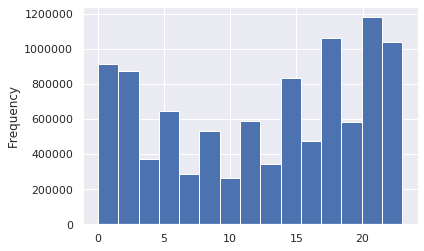

In [27]:
# Check which hours of the day are most movies watched, from the graph below we see it's the hours between 9pm and 5am
train_df['hour_of_day'].plot(kind='hist', bins = 15)

### IMDB, Movies and Tags Data Sets

Lets display the Datasets

In [28]:
display_df(movies_df)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
display_df(imdb_df)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [30]:
display_df(tags_df)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


Let's also have look at some of their basic info

In [31]:
basic_eda(tags_df)

The columns data types are as follows: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int32 
 1   movieId    1093360 non-null  int32 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int32 
dtypes: int32(3), object(1)
memory usage: 20.9+ MB
None 

The dataframe has datapoints totalling to: 

1093360 

Checking the number of missing values in the columns 

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


###### There are 16 null values in the tag column

In [33]:
basic_eda(imdb_df)

The columns data types are as follows: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int32  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float32
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float32(1), int32(1), object(4)
memory usage: 1.0+ MB
None 

The dataframe has datapoints totalling to: 

27278 

Checking the number of missing values in the columns 

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


###### Here we have Title_cast, Director, runtime, budget, and Plot_keywords columns having many null values. It's an issue that will affect how well we analyse the data sets and the insights we mine. We have to deal with the issue later.

Having looked at the three sets, we will merge them together on the movieId so as to perform better visualization analysis

In [37]:
#merge imdb set to movies set on their id 
movies_df = raw_movies_df.merge(raw_imdb_df, how = 'left', on = 'movieId')


In [38]:
movies_df = movies_df.merge(raw_tags_df, how = 'left', on = 'movieId')
display_df(movies_df)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791.0,Owned,1.515175e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048.0,imdb top 250,1.172144e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1361.0,Pixar,1.216146e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164.0,Pixar,1.223305e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164.0,time travel,1.223305e+09


In [39]:
# We create a new column 'Release year' and excttract that information from the 'Title' column, and afterwards display the dataframe
movies_df['release_year'] = movies_df["title"].str.extract(r"\((\d{4})\)$", expand=False)
movies_df["release_year"] = pd.to_numeric(movies_df["release_year"])
movies_df["title"] = movies_df.title.str.replace(r"\((\d{4})\)$", "")
movies_df.head(2)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag,timestamp,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791.0,Owned,1.515175e+09,1995.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048.0,imdb top 250,1.172144e+09,1995.0


In [40]:
# We check basic information about our new data frame movies_df, that has 12 columns
display_info(movies_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110532 entries, 0 to 1110531
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   movieId        1110532 non-null  int64  
 1   title          1110532 non-null  object 
 2   genres         1110532 non-null  object 
 3   title_cast     677587 non-null   object 
 4   director       678498 non-null   object 
 5   runtime        663981 non-null   float64
 6   budget         584923 non-null   object 
 7   plot_keywords  675004 non-null   object 
 8   userId         1093360 non-null  float64
 9   tag            1093344 non-null  object 
 10  timestamp      1093360 non-null  float64
 11  release_year   1106914 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 110.1+ MB


In [41]:
# We check the Summary statistics of the new movies_df
summary_stat(movies_df)

,movieId,runtime,userId,timestamp,release_year
count,1.110532e+06,663981.000000,1.093360e+06,1.093360e+06,1.106914e+06
mean,6.012344e+04,115.432430,6.759022e+04,1.430115e+09,1.997511e+03
std,6.085502e+04,25.505062,5.152114e+04,1.177384e+08,1.900735e+01
min,1.000000e+00,1.000000,3.000000e+00,1.135429e+09,1.874000e+03
25%,3.578000e+03,99.000000,1.520400e+04,1.339262e+09,1.991000e+03
50%,4.804300e+04,112.000000,6.219900e+04,1.468929e+09,2.003000e+03
75%,1.048810e+05,128.000000,1.136420e+05,1.527402e+09,2.011000e+03
max,2.091710e+05,877.000000,1.625340e+05,1.574317e+09,2.019000e+03


The average runtime for movies is about 115 minutes and from this also we are able to see that the maximum runtime as 877 minutes(such a long time watching a movie).

In [42]:
# We check for duplicates
# Use the DataFrame.duplicated() method to return a series of boolean values

movies_df.duplicated().value_counts()

False    1110532
dtype: int64

No duplicates!!

In [46]:
basic_eda(movies_df)

The columns data types are as follows: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110532 entries, 0 to 1110531
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   movieId        1110532 non-null  int64  
 1   title          1110532 non-null  object 
 2   genres         1110532 non-null  object 
 3   title_cast     677587 non-null   object 
 4   director       678498 non-null   object 
 5   runtime        663981 non-null   float64
 6   budget         584923 non-null   object 
 7   plot_keywords  675004 non-null   object 
 8   userId         1093360 non-null  float64
 9   tag            1093344 non-null  object 
 10  timestamp      1093360 non-null  float64
 11  release_year   1106914 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 110.1+ MB
None 

The dataframe has datapoints totalling to: 

1110532 

Checking the number of missing values in the columns 

movieId              

In [47]:
# Finding how many unique values are there in the dataset 
movies_df.nunique()

movieId           62423
title             58577
genres             1639
title_cast        15161
director          10493
runtime             257
budget             1277
plot_keywords     14246
userId            14592
tag               73050
timestamp        907730
release_year        135
dtype: int64

In [48]:
# Running this function reveals the data type on each column and the number of null values in each column which is quite substantial

basic_eda(movies_df)

The columns data types are as follows: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110532 entries, 0 to 1110531
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   movieId        1110532 non-null  int64  
 1   title          1110532 non-null  object 
 2   genres         1110532 non-null  object 
 3   title_cast     677587 non-null   object 
 4   director       678498 non-null   object 
 5   runtime        663981 non-null   float64
 6   budget         584923 non-null   object 
 7   plot_keywords  675004 non-null   object 
 8   userId         1093360 non-null  float64
 9   tag            1093344 non-null  object 
 10  timestamp      1093360 non-null  float64
 11  release_year   1106914 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 110.1+ MB
None 

The dataframe has datapoints totalling to: 

1110532 

Checking the number of missing values in the columns 

movieId              

Only three of the columns have no missing values, the rest have quite a large amount of missing values and we will visualizejust how much values we miss on this merged data set

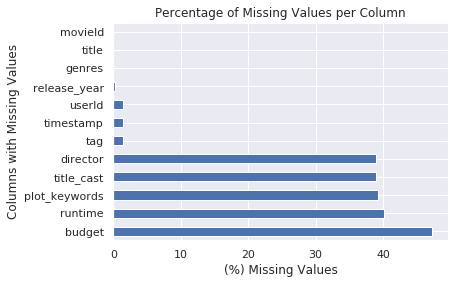

In [49]:
# The percentage of each column of missing values
total = movies_df.isnull().sum().sort_values(ascending=False)
percent_1 = movies_df.isnull().sum()/movies_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2],
                         axis=1, keys=['Total', '(%) missing'])
missing_data['(%) missing'].plot(kind='barh')
plt.xlabel('(%) Missing Values')
plt.ylabel('Columns with Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.show()

Imputation is a treatment method for missing value by filling it in using certain techniques. Can use mean, mode, or use predictive modeling. In this module, we will discuss the use of the fillna function from Pandas for this imputation. Drop rows containing missing values. Can use the dropna function from Pandas.

In [51]:
movies_df.director.fillna("No Director", inplace=True)
movies_df.title_cast.fillna("No Cast", inplace=True)

The easiest way to get rid of them would be to delete the rows with the missing data for missing values. However, this wouldn’t be beneficial to our EDA since it is a loss of information. Since “director,” “cast,” and contain the majority of null values, we chose to treat each missing value is unavailable..

###### 1. Top Directors 
To know the most popular director, we can visualize it.

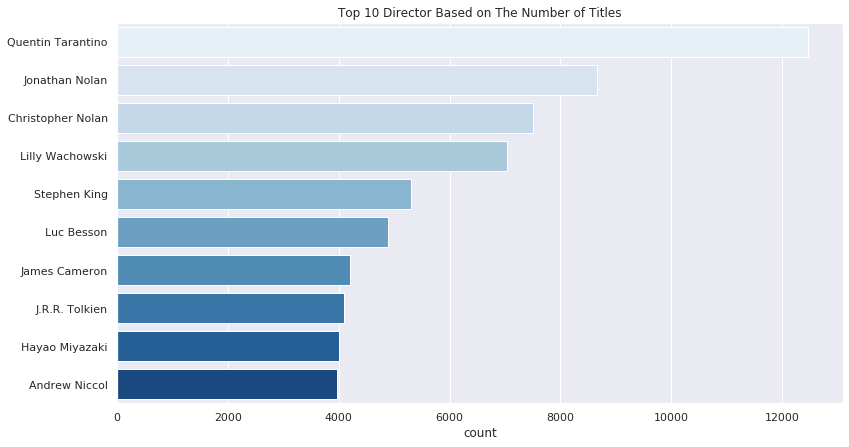

In [52]:
filtered_directors = movies_df[movies_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')

plt.show()

The most popular director on Netflix, with the most titles, is mainly Quentin Tarantino

###### 2. Top Genres 

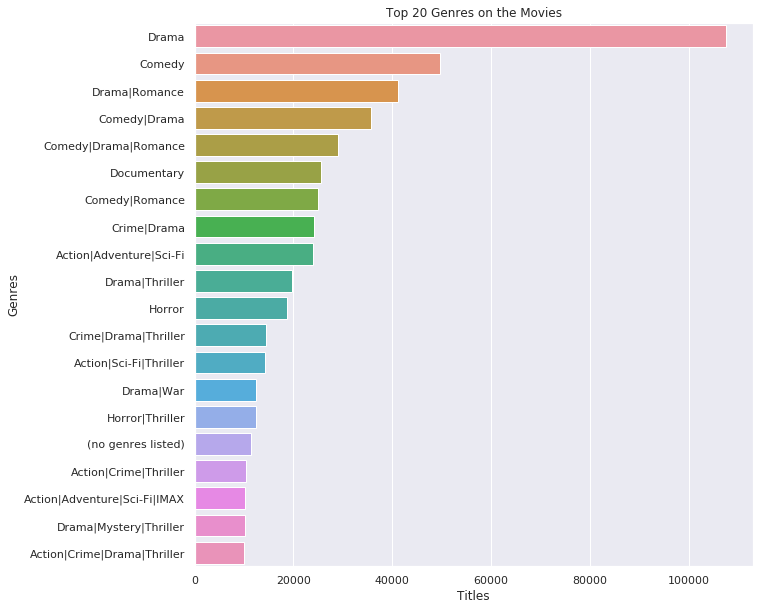

In [53]:
#he top genres that are mostly watched
filtered_genres = movies_df.set_index('title').genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

#bar graph
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on the Movies')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

###### 3. Top Actor  based on the number of titles

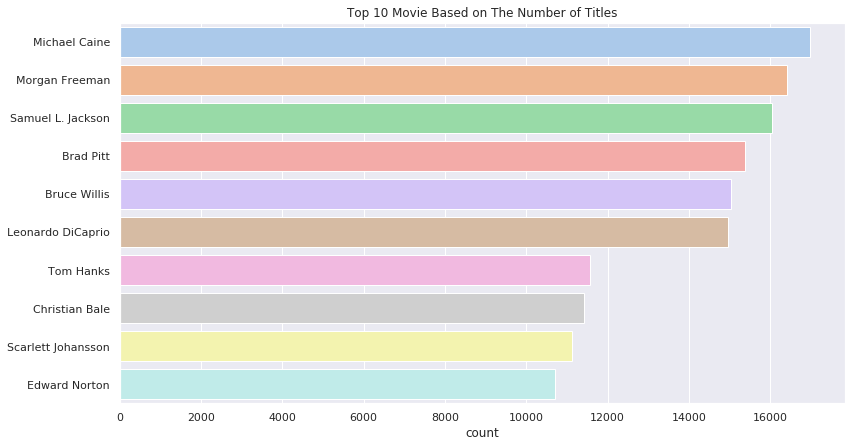

In [54]:
# get the number of casts minus the no cast
filtered_cast_shows = movies_df[movies_df['title_cast'] != 'No Cast'].set_index('title').title_cast.str.split('|', expand=True).stack().reset_index(level=1, drop=True)

#a bar graph displaying the top actors
plt.figure(figsize=(13,7))
plt.title('Top 10 Movie Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

<a id="three"></a>
## 3. FEATURE ENGINEERING
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features. The presence of irrelevant characteristics in your Data can reduce the Model accuracy and cause your Model to train based on irrelevant features. In other words, if the features are strong enough, the Machine Learning Algorithm will give fantastic outcomes.

Feature engineering helps to glean better insights.


Walk with us as we learn and model the data, with each step getting us closer to our goal of efficiently predicting with precision our data.

#### Dealing with Null Values

#### Data Scaling

#### Dimension Reduction

<a id="four"></a>
## 4. MODELLING
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Logging Experiments on Comet

In [23]:
# params = {"test_size": 0.3,
#           "model_type": "Bernoulli-Naive_Bayes",
#           "vectorizer": "tfidf vectorizer",
#           "param_grid": "None" ,
#           "stratify": True
#           }
# metrics = {"F1 score:": bnb_f1,
#            "Recall:": bnb_rec,
#            "Precision:": bnb_prec,
#            'Accuracy': bnb_acc
#            }
experiment_name = 'Comet Set Up'

In [24]:
experiment.set_name(experiment_name)
# experiment.log_parameters(params)
# experiment.log_metrics(metrics)
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jessica-njuguna/movie-recommender-2022/96aceddbc6dd40c3a99c51f43dc4b313
COMET INFO:   Others:
COMET INFO:     Name : Comet Set Up
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     os packages                  : 1
COMET INFO:     source_code                  : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program 

<a id="five"></a>
## 5. MODEL PERFORMANCE COMPARISON
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="six"></a>
## 6. MODEL EXPLANATIONS
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 7. CONCLUSION
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="eight"></a>
## 8. APPENDIX
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>